# Phase 1: Data Foundation & Exploratory Data Analysis
## Online Retail Intelligence System

**Objective**: Understand data quality, distributions, and extract initial business insights

**Deliverables**:
- Data quality report (missing values, outliers, anomalies)
- Business KPIs baseline
- Temporal patterns analysis
- Geographic distribution
- Product & customer insights

---

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


---
## 1. Data Loading & Initial Inspection

In [15]:
# Load dataset
path = "/home/cairo/code/portfolio/customer-segmentation/data/raw/"
path_processed = "/home/cairo/code/portfolio/customer-segmentation/data/processed/"
path_reports = "/home/cairo/code/portfolio/customer-segmentation/outputs/reports/"
path_features = "/home/cairo/code/portfolio/customer-segmentation/data/features/"
path_campaigns = "/home/cairo/code/portfolio/customer-segmentation/outputs/campaigns/"
path_figures = "/home/cairo/code/portfolio/customer-segmentation/outputs/figures/"
path_models = "/home/cairo/code/portfolio/customer-segmentation/outputs/models/"


df = pd.read_csv(path + 'online_retail.csv')

print(f"Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*70)
df.head(10)

Dataset loaded: 1,067,371 rows × 8 columns
Memory usage: 136.64 MB



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [16]:
# Data types and info
print("📋 Dataset Information:")
print("="*70)
df.info()
print("\n" + "="*70)
print("\n📊 Statistical Summary:")
df.describe(include='all').T

📋 Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  str    
 1   StockCode    1067371 non-null  str    
 2   Description  1062989 non-null  str    
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  str    
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 136.6 MB


📊 Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 2. Data Quality Assessment

In [17]:
# Missing values analysis
def analyze_missing_values(df):
    """
    Comprehensive missing value analysis
    """
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Data_Type': df.dtypes
    })
    
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    ).reset_index(drop=True)
    
    return missing_data

missing_report = analyze_missing_values(df)
print("🚨 MISSING VALUES REPORT")
print("="*70)
if len(missing_report) > 0:
    print(missing_report.to_string(index=False))
    print(f"\n⚠️  Total columns with missing data: {len(missing_report)}")
else:
    print("✅ No missing values detected!")

🚨 MISSING VALUES REPORT
     Column  Missing_Count  Missing_Percentage Data_Type
Customer ID         243007               22.77   float64
Description           4382                0.41       str

⚠️  Total columns with missing data: 2


In [18]:
# Customer ID missing analysis - CRITICAL for segmentation
customer_missing = df['Customer ID'].isnull().sum()
customer_missing_pct = (customer_missing / len(df) * 100)

print("🎯 CUSTOMER ID ANALYSIS (Critical for Segmentation)")
print("="*70)
print(f"Missing Customer IDs: {customer_missing:,} ({customer_missing_pct:.2f}%)")
print(f"Valid Customer IDs: {df['Customer ID'].notna().sum():,} ({100-customer_missing_pct:.2f}%)")
print(f"\n💡 Business Impact:")
print(f"   → {customer_missing_pct:.1f}% of transactions cannot be segmented")
print(f"   → Segmentation will focus on {100-customer_missing_pct:.1f}% of identifiable customers")

# Revenue impact of missing Customer IDs
df['TotalRevenue'] = df['Quantity'] * df['Price']
revenue_missing = df[df['Customer ID'].isnull()]['TotalRevenue'].sum()
total_revenue = df['TotalRevenue'].sum()
revenue_missing_pct = (revenue_missing / total_revenue * 100) if total_revenue != 0 else 0

print(f"\n💰 Revenue Impact:")
print(f"   → Revenue from unidentified customers: £{revenue_missing:,.2f} ({revenue_missing_pct:.2f}%)")
print(f"   → Revenue from identified customers: £{total_revenue - revenue_missing:,.2f}")

🎯 CUSTOMER ID ANALYSIS (Critical for Segmentation)
Missing Customer IDs: 243,007 (22.77%)
Valid Customer IDs: 824,364 (77.23%)

💡 Business Impact:
   → 22.8% of transactions cannot be segmented
   → Segmentation will focus on 77.2% of identifiable customers

💰 Revenue Impact:
   → Revenue from unidentified customers: £2,638,958.18 (13.68%)
   → Revenue from identified customers: £16,648,292.39


In [19]:
# Duplicate transactions check
duplicates = df.duplicated().sum()
print("🔍 DUPLICATE RECORDS CHECK")
print("="*70)
print(f"Exact duplicate rows: {duplicates:,}")

if duplicates > 0:
    print(f"⚠️  {(duplicates/len(df)*100):.2f}% of data are duplicates")
else:
    print("✅ No duplicate rows found")

🔍 DUPLICATE RECORDS CHECK
Exact duplicate rows: 34,335
⚠️  3.22% of data are duplicates


In [20]:
# Data anomalies detection
print("🔬 DATA ANOMALIES & QUALITY ISSUES")
print("="*70)

# 1. Negative quantities (returns/cancellations)
negative_qty = (df['Quantity'] < 0).sum()
negative_qty_pct = (negative_qty / len(df) * 100)
print(f"\n1. Negative Quantities (Returns/Cancellations):")
print(f"   Count: {negative_qty:,} ({negative_qty_pct:.2f}%)")
print(f"   Min quantity: {df['Quantity'].min()}")
print(f"   → These likely represent returns or order cancellations")

# 2. Zero or negative prices
zero_price = (df['Price'] == 0).sum()
negative_price = (df['Price'] < 0).sum()
print(f"\n2. Price Anomalies:")
print(f"   Zero prices: {zero_price:,}")
print(f"   Negative prices: {negative_price:,}")
if zero_price > 0 or negative_price > 0:
    print(f"   ⚠️  Potential data quality issues or promotional items")

# 3. Missing descriptions
missing_desc = df['Description'].isnull().sum()
print(f"\n3. Missing Product Descriptions:")
print(f"   Count: {missing_desc:,} ({(missing_desc/len(df)*100):.2f}%)")
print(f"   → Will impact market basket analysis")

# 4. Extreme quantities (potential outliers or bulk orders)
q99 = df['Quantity'].quantile(0.99)
extreme_qty = (df['Quantity'] > q99).sum()
print(f"\n4. Extreme Quantities (>99th percentile = {q99:.0f}):")
print(f"   Count: {extreme_qty:,}")
print(f"   Max quantity: {df['Quantity'].max():,}")
print(f"   → Likely bulk B2B orders (expected in this context)")

🔬 DATA ANOMALIES & QUALITY ISSUES

1. Negative Quantities (Returns/Cancellations):
   Count: 22,950 (2.15%)
   Min quantity: -80995
   → These likely represent returns or order cancellations

2. Price Anomalies:
   Zero prices: 6,202
   Negative prices: 5
   ⚠️  Potential data quality issues or promotional items

3. Missing Product Descriptions:
   Count: 4,382 (0.41%)
   → Will impact market basket analysis

4. Extreme Quantities (>99th percentile = 100):
   Count: 10,561
   Max quantity: 80,995
   → Likely bulk B2B orders (expected in this context)


---
## 3. Temporal Analysis

In [21]:
# Parse dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract temporal features for analysis
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df['Date'] = df['InvoiceDate'].dt.date

print("📅 TEMPORAL COVERAGE")
print("="*70)
print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Total Days: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")
print(f"Years Covered: {sorted(df['Year'].unique())}")
print(f"\n✅ Dates parsed successfully")

📅 TEMPORAL COVERAGE
Date Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Total Days: 738 days
Years Covered: [np.int32(2009), np.int32(2010), np.int32(2011)]

✅ Dates parsed successfully


In [22]:
# Daily transaction trends
daily_stats = df.groupby('Date').agg({
    'Invoice': 'nunique',
    'TotalRevenue': 'sum',
    'Customer ID': 'nunique'
}).reset_index()

daily_stats.columns = ['Date', 'Transactions', 'Revenue', 'UniqueCustomers']

print("📊 DAILY TRANSACTION STATISTICS")
print("="*70)
print(f"Average transactions/day: {daily_stats['Transactions'].mean():.1f}")
print(f"Average revenue/day: £{daily_stats['Revenue'].mean():,.2f}")
print(f"Average unique customers/day: {daily_stats['UniqueCustomers'].mean():.1f}")
print(f"\nPeak day: {daily_stats.loc[daily_stats['Revenue'].idxmax(), 'Date']} (£{daily_stats['Revenue'].max():,.2f})")
print(f"Lowest day: {daily_stats.loc[daily_stats['Revenue'].idxmin(), 'Date']} (£{daily_stats['Revenue'].min():,.2f})")

📊 DAILY TRANSACTION STATISTICS
Average transactions/day: 88.8
Average revenue/day: £31,932.53
Average unique customers/day: 63.7

Peak day: 2010-12-01 (£117,271.12)
Lowest day: 2010-04-29 (£-22,212.61)


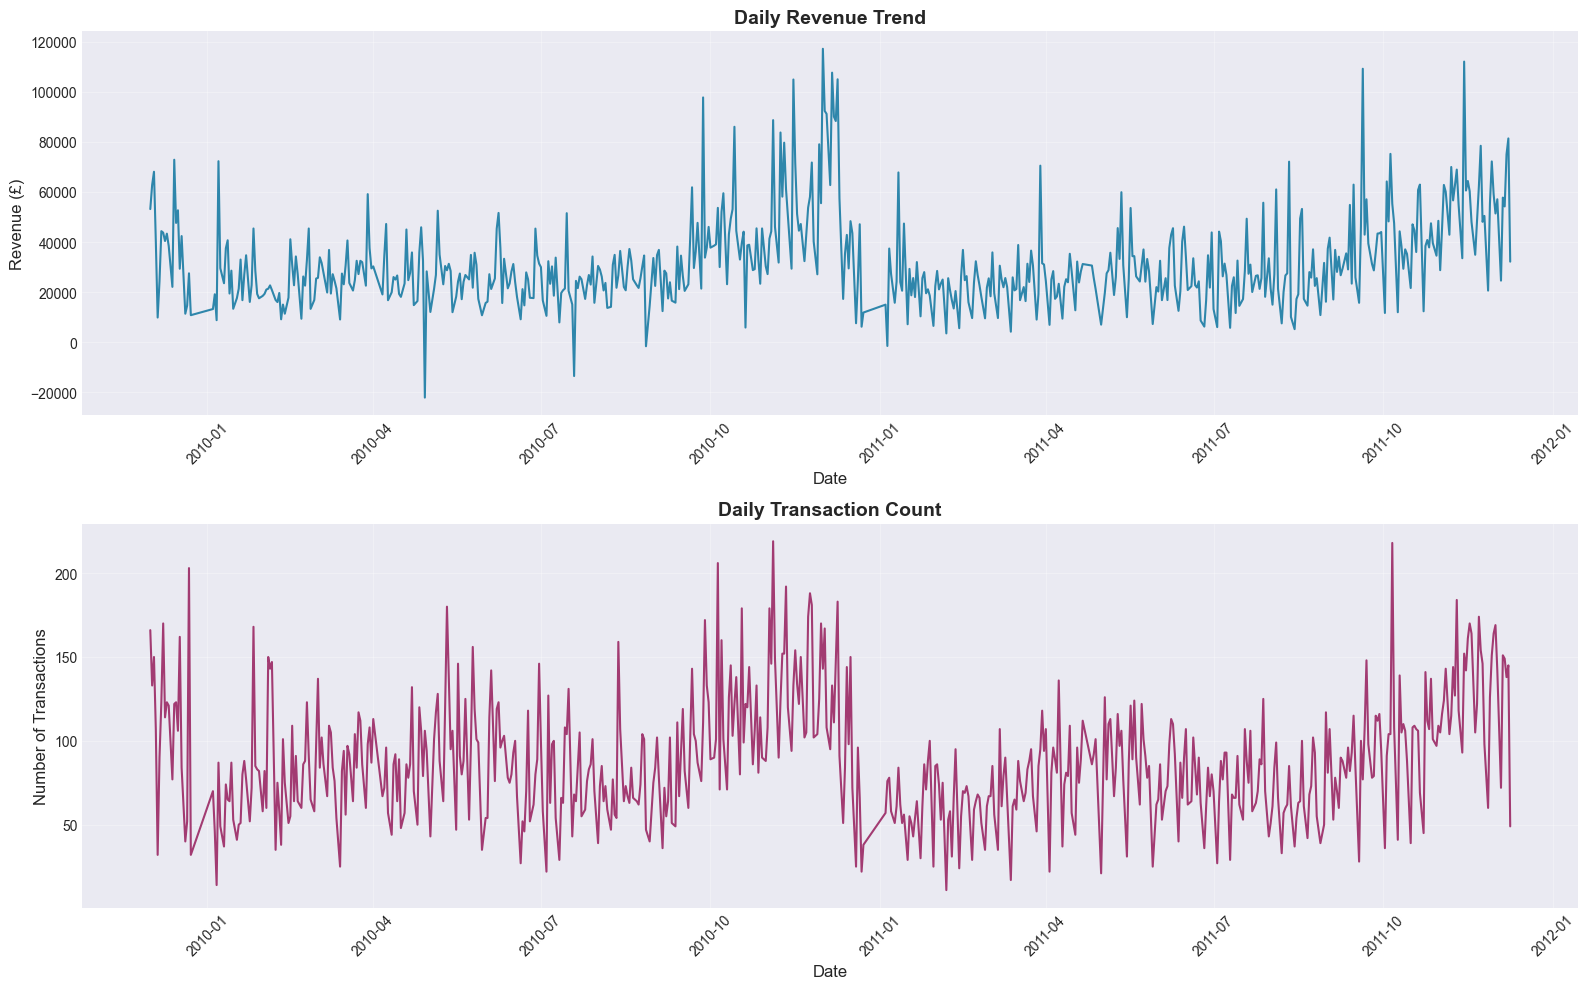

✅ Temporal trend charts created


In [23]:
# Visualize daily revenue trend
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Revenue over time
axes[0].plot(daily_stats['Date'], daily_stats['Revenue'], linewidth=1.5, color='#2E86AB')
axes[0].set_title('Daily Revenue Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Revenue (£)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Transactions over time
axes[1].plot(daily_stats['Date'], daily_stats['Transactions'], linewidth=1.5, color='#A23B72')
axes[1].set_title('Daily Transaction Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of Transactions', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path_figures + "temporal_trends.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Temporal trend charts created")


📅 DAY OF WEEK PATTERNS
           Invoice  TotalRevenue
DayOfWeek                       
Monday      189084   3335216.106
Tuesday     196626   3774873.772
Wednesday   185051   3390238.013
Thursday    203149   3995032.012
Friday      153803   2955601.043
Saturday       402      9803.050
Sunday      139256   1826486.572


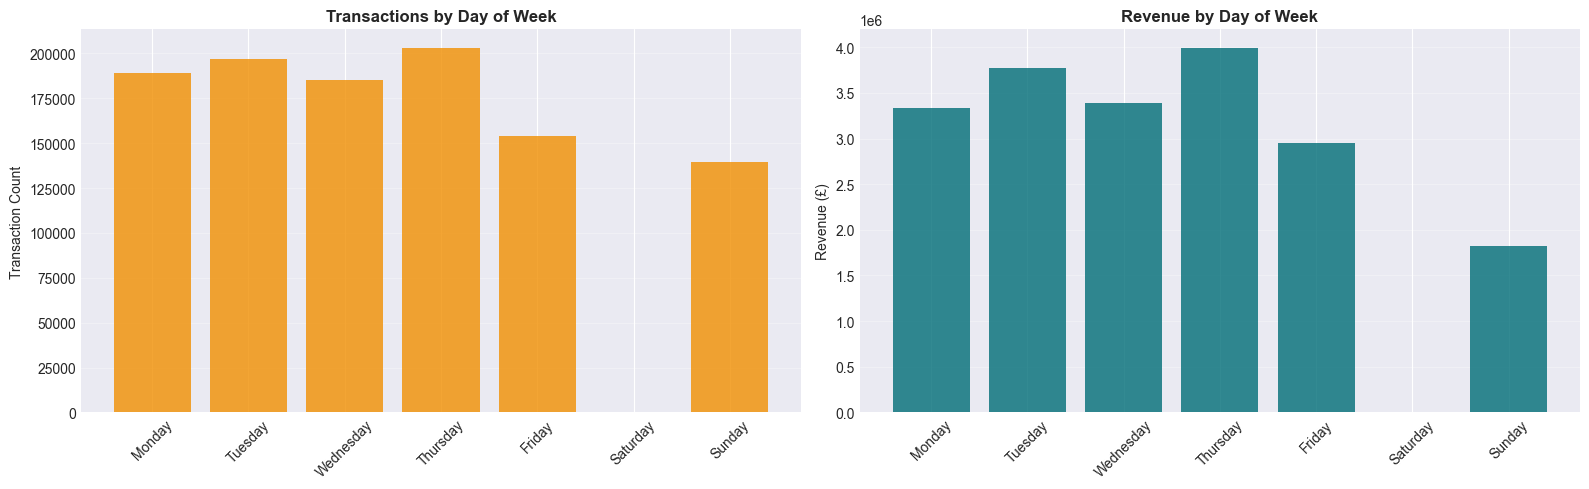

In [24]:
# Day of week patterns
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats = df.groupby('DayOfWeek').agg({
    'Invoice': 'count',
    'TotalRevenue': 'sum'
}).reindex(dow_order)

print("\n📅 DAY OF WEEK PATTERNS")
print("="*70)
print(dow_stats)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Transactions by day
axes[0].bar(range(7), dow_stats['Invoice'], color='#F18F01', alpha=0.8)
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(dow_order, rotation=45)
axes[0].set_title('Transactions by Day of Week', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Transaction Count')
axes[0].grid(axis='y', alpha=0.3)

# Revenue by day
axes[1].bar(range(7), dow_stats['TotalRevenue'], color='#006D77', alpha=0.8)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_order, rotation=45)
axes[1].set_title('Revenue by Day of Week', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Revenue (£)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(path_figures + 'day_of_week_patterns.png', dpi=300, bbox_inches='tight')
plt.show()


🕐 HOURLY PATTERNS
Peak transaction hour: 12:00 (159,846 transactions)
Lowest transaction hour: 21:00 (1 transactions)


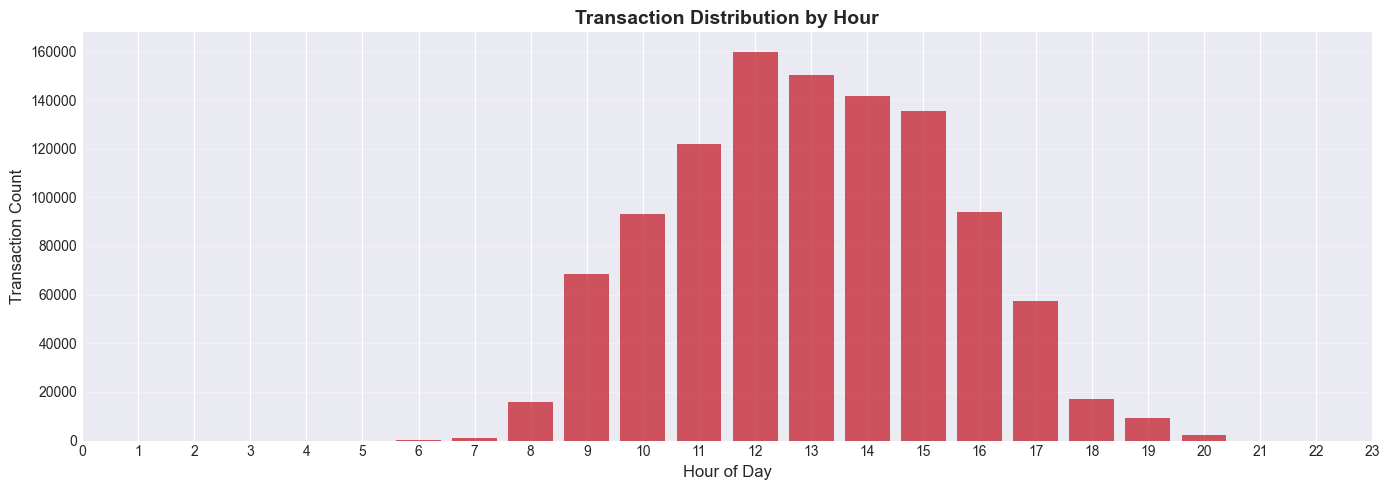

In [25]:
# Hour of day patterns
hourly_stats = df.groupby('Hour').agg({
    'Invoice': 'count',
    'TotalRevenue': 'sum'
})

print("\n🕐 HOURLY PATTERNS")
print("="*70)
print(f"Peak transaction hour: {hourly_stats['Invoice'].idxmax()}:00 ({hourly_stats['Invoice'].max():,} transactions)")
print(f"Lowest transaction hour: {hourly_stats['Invoice'].idxmin()}:00 ({hourly_stats['Invoice'].min():,} transactions)")

# Visualize
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(hourly_stats.index, hourly_stats['Invoice'], color='#C1121F', alpha=0.7)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
ax.set_title('Transaction Distribution by Hour', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(path_figures + 'hourly_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 4. Business KPIs & Metrics

In [26]:
# Core business metrics
print("💼 KEY BUSINESS METRICS")
print("="*70)

# Filter to valid transactions (positive quantity and price)
df_valid = df[(df['Quantity'] > 0) & (df['Price'] > 0)].copy()

total_revenue = df_valid['TotalRevenue'].sum()
total_transactions = df_valid['Invoice'].nunique()
total_customers = df_valid['Customer ID'].nunique()
total_products = df_valid['StockCode'].nunique()
total_countries = df_valid['Country'].nunique()

avg_order_value = total_revenue / total_transactions
avg_items_per_order = df_valid.groupby('Invoice')['Quantity'].sum().mean()
avg_revenue_per_customer = total_revenue / total_customers

print(f"\n📊 VOLUME METRICS:")
print(f"   Total Revenue: £{total_revenue:,.2f}")
print(f"   Total Transactions: {total_transactions:,}")
print(f"   Total Customers: {total_customers:,}")
print(f"   Total Products (SKUs): {total_products:,}")
print(f"   Countries Served: {total_countries}")

print(f"\n💰 AVERAGE METRICS:")
print(f"   Average Order Value (AOV): £{avg_order_value:.2f}")
print(f"   Average Items per Order: {avg_items_per_order:.1f}")
print(f"   Average Revenue per Customer: £{avg_revenue_per_customer:,.2f}")

# Purchase frequency
purchase_freq = df_valid.groupby('Customer ID')['Invoice'].nunique().mean()
print(f"   Average Purchase Frequency: {purchase_freq:.2f} orders/customer")

💼 KEY BUSINESS METRICS

📊 VOLUME METRICS:
   Total Revenue: £20,972,968.14
   Total Transactions: 40,078
   Total Customers: 5,878
   Total Products (SKUs): 4,917
   Countries Served: 43

💰 AVERAGE METRICS:
   Average Order Value (AOV): £523.30
   Average Items per Order: 285.0
   Average Revenue per Customer: £3,568.04
   Average Purchase Frequency: 6.29 orders/customer


In [27]:
# Revenue distribution analysis
print("\n💎 REVENUE DISTRIBUTION ANALYSIS")
print("="*70)

revenue_by_customer = df_valid.groupby('Customer ID')['TotalRevenue'].sum().sort_values(ascending=False)

# Pareto analysis (80/20 rule)
cumulative_revenue = revenue_by_customer.cumsum()
total_revenue_sum = revenue_by_customer.sum()
customers_for_80_pct = (cumulative_revenue <= total_revenue_sum * 0.8).sum()
pct_customers_80_revenue = (customers_for_80_pct / len(revenue_by_customer)) * 100

print(f"Pareto Analysis (80/20 Rule):")
print(f"   Top {pct_customers_80_revenue:.1f}% of customers generate 80% of revenue")
print(f"   That's {customers_for_80_pct} out of {len(revenue_by_customer):,} customers")

# Top customers
print(f"\nTop 10 Customers by Revenue:")
top_10_customers = revenue_by_customer.head(10)
for i, (cust_id, revenue) in enumerate(top_10_customers.items(), 1):
    print(f"   {i}. Customer {int(cust_id)}: £{revenue:,.2f}")


💎 REVENUE DISTRIBUTION ANALYSIS
Pareto Analysis (80/20 Rule):
   Top 23.0% of customers generate 80% of revenue
   That's 1352 out of 5,878 customers

Top 10 Customers by Revenue:
   1. Customer 18102: £608,821.65
   2. Customer 14646: £528,602.52
   3. Customer 14156: £313,946.37
   4. Customer 14911: £295,972.63
   5. Customer 17450: £246,973.09
   6. Customer 13694: £196,482.81
   7. Customer 17511: £175,603.55
   8. Customer 16446: £168,472.50
   9. Customer 16684: £147,142.77
   10. Customer 12415: £144,458.37


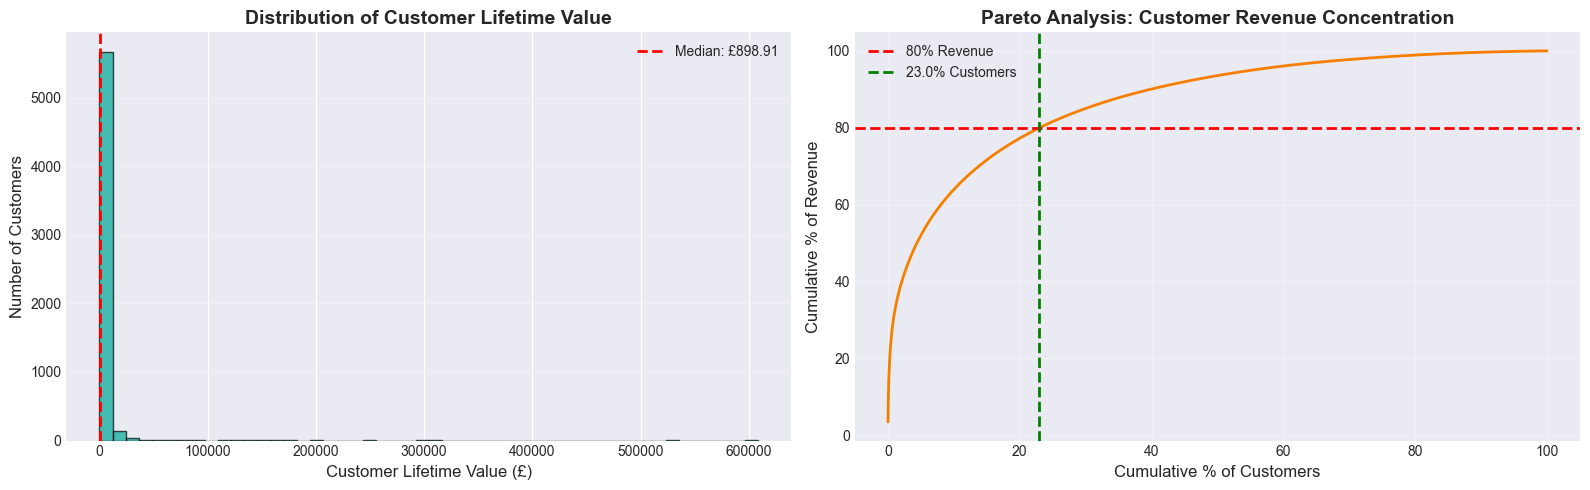

In [28]:
# Visualize revenue distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of customer revenue
axes[0].hist(revenue_by_customer, bins=50, color='#00A896', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Customer Lifetime Value (£)', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Distribution of Customer Lifetime Value', fontsize=14, fontweight='bold')
axes[0].axvline(revenue_by_customer.median(), color='red', linestyle='--', linewidth=2, label=f'Median: £{revenue_by_customer.median():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Pareto chart
cumulative_pct = (cumulative_revenue / total_revenue_sum * 100).values
customer_pct = np.arange(1, len(revenue_by_customer) + 1) / len(revenue_by_customer) * 100

axes[1].plot(customer_pct, cumulative_pct, linewidth=2, color='#F77F00')
axes[1].axhline(80, color='red', linestyle='--', linewidth=2, label='80% Revenue')
axes[1].axvline(pct_customers_80_revenue, color='green', linestyle='--', linewidth=2, label=f'{pct_customers_80_revenue:.1f}% Customers')
axes[1].set_xlabel('Cumulative % of Customers', fontsize=12)
axes[1].set_ylabel('Cumulative % of Revenue', fontsize=12)
axes[1].set_title('Pareto Analysis: Customer Revenue Concentration', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(path_figures + 'revenue_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 5. Geographic Analysis

In [29]:
# Country distribution
country_stats = df_valid.groupby('Country').agg({
    'Invoice': 'nunique',
    'Customer ID': 'nunique',
    'TotalRevenue': 'sum',
    'Quantity': 'sum'
}).sort_values('TotalRevenue', ascending=False)

country_stats.columns = ['Transactions', 'Customers', 'Revenue', 'Items_Sold']
country_stats['Avg_Order_Value'] = country_stats['Revenue'] / country_stats['Transactions']
country_stats['Revenue_pct'] = (country_stats['Revenue'] / country_stats['Revenue'].sum() * 100).round(2)

print("🌍 GEOGRAPHIC DISTRIBUTION")
print("="*70)
print(f"Total Countries: {len(country_stats)}")
print(f"\nTop 10 Countries by Revenue:")
print(country_stats.head(10).to_string())

🌍 GEOGRAPHIC DISTRIBUTION
Total Countries: 43

Top 10 Countries by Revenue:
                Transactions  Customers       Revenue  Items_Sold  Avg_Order_Value  Revenue_pct
Country                                                                                        
United Kingdom         36536       5350  1.787135e+07     9383245       489.143621        85.21
EIRE                     626          5  6.644318e+05      340289      1061.392620         3.17
Netherlands              228         22  5.542323e+05      383977      2430.843596         2.64
Germany                  789        107  4.312625e+05      227983       546.593740         2.06
France                   622         95  3.569446e+05      275287       573.865916         1.70
Australia                 95         15  1.699681e+05      104090      1789.138000         0.81
Spain                    154         41  1.091785e+05       50796       708.951494         0.52
Switzerland               93         22  1.010113e+05       

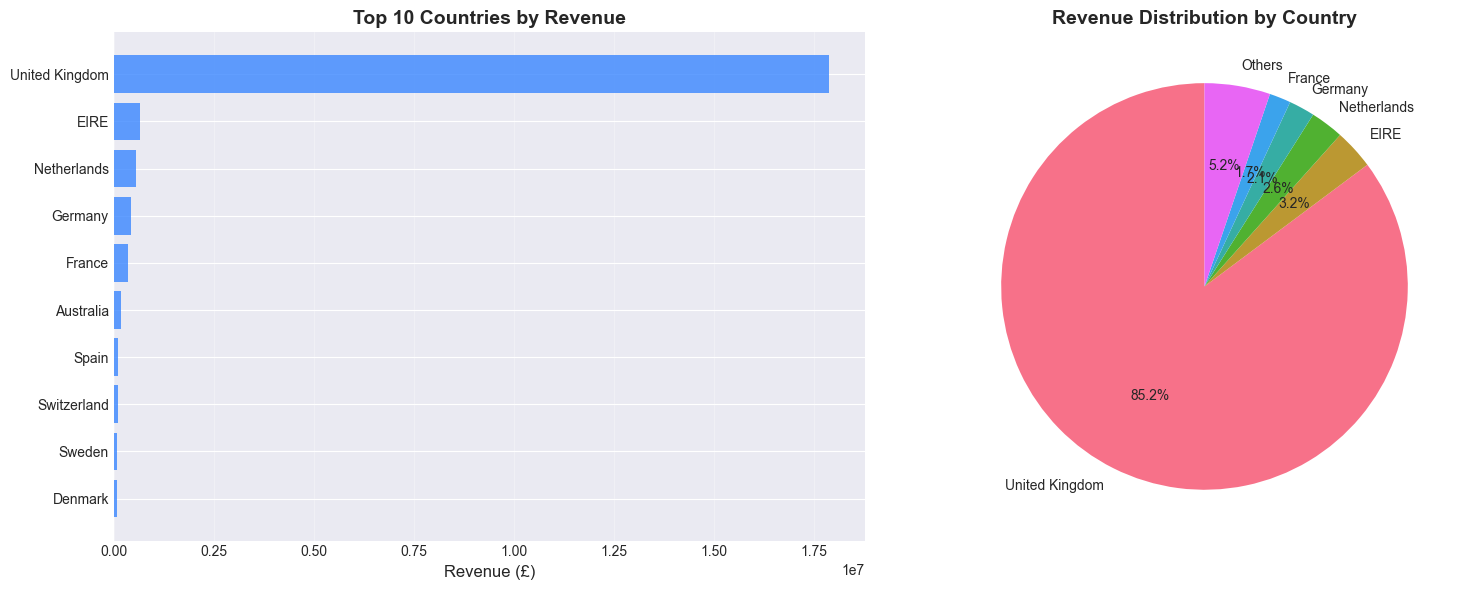


🇬🇧 UK Market Analysis:
   UK Revenue: £17,871,351.35 (85.2% of total)
   UK Customers: 5,350
   → UK is the dominant market (expected for UK-based retailer)


In [30]:
# Visualize top countries
top_10_countries = country_stats.head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue by country
axes[0].barh(range(len(top_10_countries)), top_10_countries['Revenue'], color='#3A86FF', alpha=0.8)
axes[0].set_yticks(range(len(top_10_countries)))
axes[0].set_yticklabels(top_10_countries.index)
axes[0].set_xlabel('Revenue (£)', fontsize=12)
axes[0].set_title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Revenue percentage pie chart
# Group smaller countries
top_5 = country_stats.head(5)
others_revenue = country_stats.iloc[5:]['Revenue'].sum()
pie_data = list(top_5['Revenue']) + [others_revenue]
pie_labels = list(top_5.index) + ['Others']

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl', len(pie_labels)))
axes[1].set_title('Revenue Distribution by Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(path_figures + 'geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# UK dominance analysis
uk_revenue = country_stats.loc['United Kingdom', 'Revenue']
uk_pct = country_stats.loc['United Kingdom', 'Revenue_pct']
print(f"\n🇬🇧 UK Market Analysis:")
print(f"   UK Revenue: £{uk_revenue:,.2f} ({uk_pct:.1f}% of total)")
print(f"   UK Customers: {country_stats.loc['United Kingdom', 'Customers']:,}")
print(f"   → UK is the dominant market (expected for UK-based retailer)")

---
## 6. Product Analysis

In [31]:
# Product performance
product_stats = df_valid.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalRevenue': 'sum',
    'Invoice': 'nunique'
}).sort_values('TotalRevenue', ascending=False)

product_stats.columns = ['Units_Sold', 'Revenue', 'Transactions']
product_stats['Avg_Price'] = product_stats['Revenue'] / product_stats['Units_Sold']

print("🛍️ PRODUCT ANALYSIS")
print("="*70)
print(f"Total Unique Products: {len(product_stats):,}")
print(f"\nTop 15 Products by Revenue:")
print(product_stats.head(15).to_string())

🛍️ PRODUCT ANALYSIS
Total Unique Products: 5,630

Top 15 Products by Revenue:
                                               Units_Sold    Revenue  Transactions   Avg_Price
StockCode Description                                                                         
22423     REGENCY CAKESTAND 3 TIER                  27577  344563.25          3918   12.494588
M         Manual                                    10051  341089.85           785   33.935912
DOT       DOTCOM POSTAGE                             1436  322657.48          1415  224.691838
85123A    WHITE HANGING HEART T-LIGHT HOLDER        96086  262931.16          5356    2.736415
23843     PAPER CRAFT , LITTLE BIRDIE               80995  168469.60             1    2.080000
47566     PARTY BUNTING                             28378  149187.05          2674    5.257138
85099B    JUMBO BAG RED RETROSPOT                   78860  148823.92          3245    1.887191
84879     ASSORTED COLOUR BIRD ORNAMENT             81809  132187.9

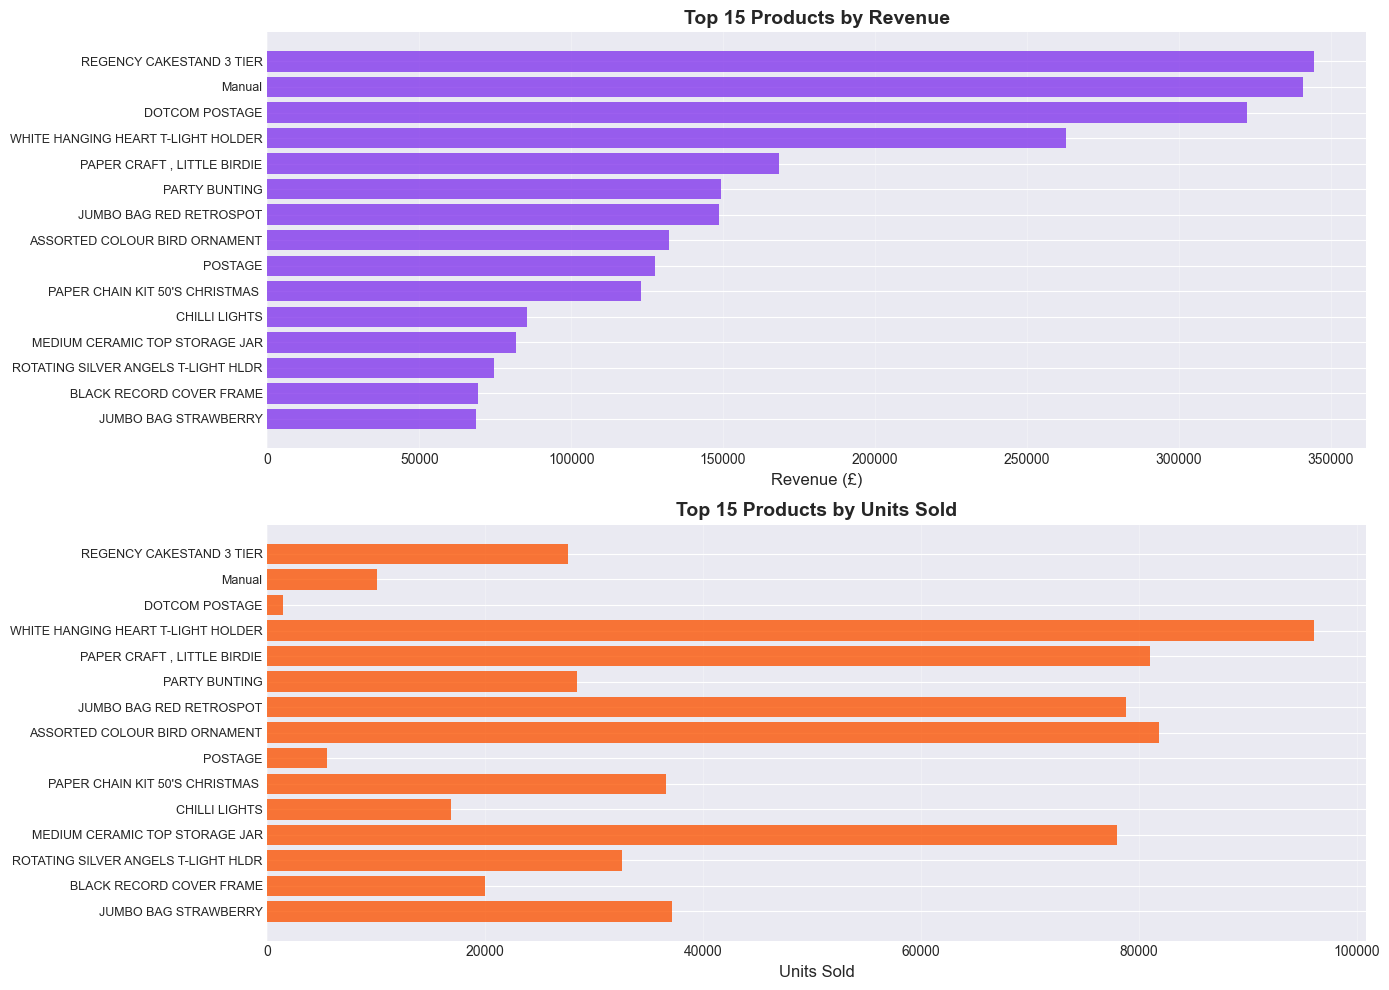

In [32]:
# Top products visualization
top_15_products = product_stats.head(15)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
product_names = [desc[:40] + '...' if len(desc) > 40 else desc for desc in top_15_products.index.get_level_values('Description')]
axes[0].barh(range(len(top_15_products)), top_15_products['Revenue'], color='#8338EC', alpha=0.8)
axes[0].set_yticks(range(len(top_15_products)))
axes[0].set_yticklabels(product_names, fontsize=9)
axes[0].set_xlabel('Revenue (£)', fontsize=12)
axes[0].set_title('Top 15 Products by Revenue', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Units sold
axes[1].barh(range(len(top_15_products)), top_15_products['Units_Sold'], color='#FB5607', alpha=0.8)
axes[1].set_yticks(range(len(top_15_products)))
axes[1].set_yticklabels(product_names, fontsize=9)
axes[1].set_xlabel('Units Sold', fontsize=12)
axes[1].set_title('Top 15 Products by Units Sold', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(path_figures + 'top_products.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 7. Customer Behavior Insights

In [33]:
# Customer purchase patterns
customer_behavior = df_valid.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'TotalRevenue': 'sum',
    'Quantity': 'sum',
    'InvoiceDate': ['min', 'max']
})

customer_behavior.columns = ['Num_Purchases', 'Total_Revenue', 'Total_Items', 'First_Purchase', 'Last_Purchase']
customer_behavior['Avg_Order_Value'] = customer_behavior['Total_Revenue'] / customer_behavior['Num_Purchases']
customer_behavior['Customer_Tenure_Days'] = (customer_behavior['Last_Purchase'] - customer_behavior['First_Purchase']).dt.days

print("👥 CUSTOMER BEHAVIOR ANALYSIS")
print("="*70)
print(f"\nPurchase Frequency Distribution:")
print(customer_behavior['Num_Purchases'].describe())

print(f"\nCustomer Segmentation by Purchase Frequency:")
freq_bins = [1, 2, 5, 10, 50, customer_behavior['Num_Purchases'].max()]
freq_labels = ['One-time', 'Occasional (2-4)', 'Regular (5-9)', 'Frequent (10-49)', 'VIP (50+)']
customer_behavior['Frequency_Segment'] = pd.cut(customer_behavior['Num_Purchases'], bins=freq_bins, labels=freq_labels, include_lowest=True)

freq_distribution = customer_behavior['Frequency_Segment'].value_counts().sort_index()
print(freq_distribution)

# One-time vs repeat customers
one_time = (customer_behavior['Num_Purchases'] == 1).sum()
repeat = (customer_behavior['Num_Purchases'] > 1).sum()
print(f"\n🔄 Repeat Purchase Analysis:")
print(f"   One-time customers: {one_time:,} ({one_time/len(customer_behavior)*100:.1f}%)")
print(f"   Repeat customers: {repeat:,} ({repeat/len(customer_behavior)*100:.1f}%)")
print(f"   → Retention opportunity: Convert one-time buyers to repeat customers")

👥 CUSTOMER BEHAVIOR ANALYSIS

Purchase Frequency Distribution:
count    5878.000000
mean        6.289384
std        13.009406
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       398.000000
Name: Num_Purchases, dtype: float64

Customer Segmentation by Purchase Frequency:
Frequency_Segment
One-time            2567
Occasional (2-4)    1510
Regular (5-9)        925
Frequent (10-49)     822
VIP (50+)             54
Name: count, dtype: int64

🔄 Repeat Purchase Analysis:
   One-time customers: 1,623 (27.6%)
   Repeat customers: 4,255 (72.4%)
   → Retention opportunity: Convert one-time buyers to repeat customers


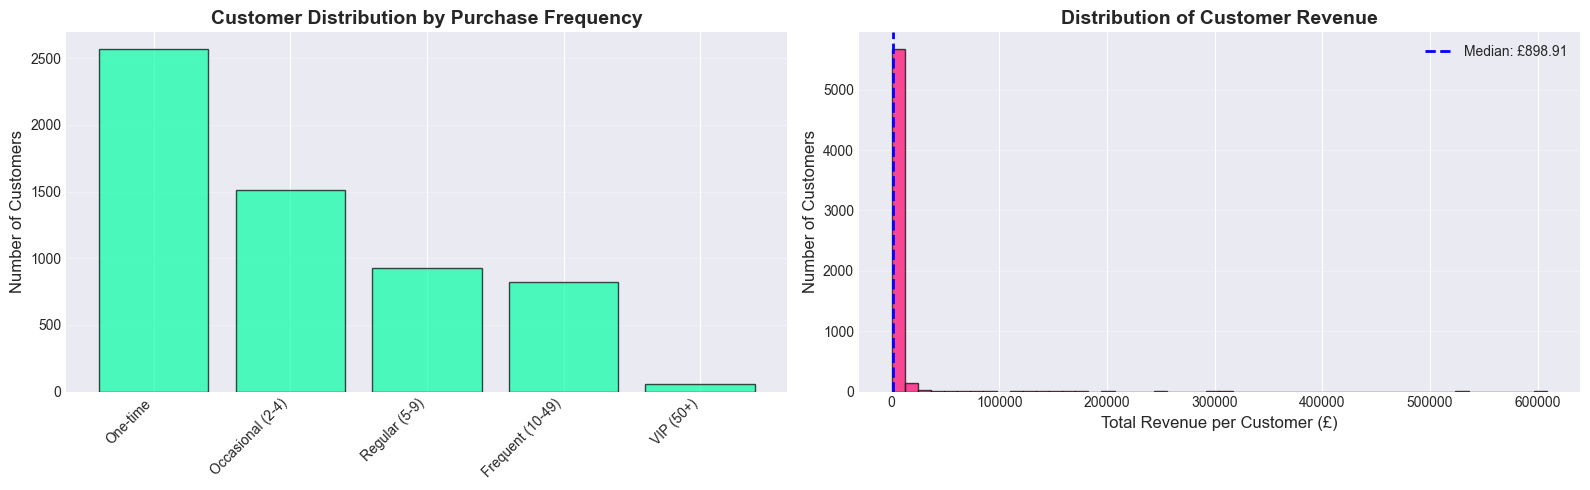

In [34]:
# Visualize customer segments
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Frequency distribution
freq_dist = customer_behavior['Frequency_Segment'].value_counts()
axes[0].bar(range(len(freq_dist)), freq_dist.values, color='#06FFA5', alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(len(freq_dist)))
axes[0].set_xticklabels(freq_dist.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Customer Distribution by Purchase Frequency', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Revenue distribution
axes[1].hist(customer_behavior['Total_Revenue'], bins=50, color='#FF006E', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Total Revenue per Customer (£)', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Distribution of Customer Revenue', fontsize=14, fontweight='bold')
axes[1].axvline(customer_behavior['Total_Revenue'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: £{customer_behavior["Total_Revenue"].median():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(path_figures + 'customer_segments.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 8. Data Quality Summary & Recommendations

In [35]:
print("\n" + "="*70)
print("📋 DATA QUALITY SUMMARY & PREPROCESSING RECOMMENDATIONS")
print("="*70)

print("\n✅ STRENGTHS:")
print("   1. Clean temporal data - no gaps in date range")
print("   2. Rich transactional detail (quantity, price, products)")
print("   3. Geographic diversity (multiple countries)")
print("   4. Sufficient volume for ML/segmentation")

print("\n⚠️  ISSUES TO ADDRESS:")
print("\n   1. Missing Customer IDs:")
print(f"      - {customer_missing_pct:.1f}% of transactions lack customer identifiers")
print("      - DECISION REQUIRED: Exclude for segmentation or create 'Guest' segment?")
print("      - RECOMMENDATION: Exclude from customer-level analysis")

print("\n   2. Returns/Cancellations (Negative Quantities):")
print(f"      - {negative_qty_pct:.1f}% of transactions are returns")
print("      - DECISION REQUIRED: How to handle in CLV calculation?")
print("      - RECOMMENDATION: Create 'return_rate' feature; net out for revenue metrics")

print("\n   3. Zero/Negative Prices:")
print(f"      - {zero_price:,} transactions with £0 price")
print("      - RECOMMENDATION: Exclude from revenue calculations")

print("\n   4. Missing Descriptions:")
print(f"      - {missing_desc:,} products without descriptions")
print("      - IMPACT: Limits market basket analysis")
print("      - RECOMMENDATION: Use StockCode as fallback for association rules")

print("\n📊 NEXT STEPS FOR PHASE 2:")
print("   1. Create cleaned dataset: positive quantities, positive prices, valid Customer IDs")
print("   2. Calculate RFM scores using last transaction date as reference")
print("   3. Engineer behavioral features (frequency, recency, monetary)")
print("   4. Document all preprocessing decisions in DECISIONS.md")

print("\n" + "="*70)
print("✅ EDA COMPLETE - Ready to proceed to Phase 2: RFM Analysis")
print("="*70)


📋 DATA QUALITY SUMMARY & PREPROCESSING RECOMMENDATIONS

✅ STRENGTHS:
   1. Clean temporal data - no gaps in date range
   2. Rich transactional detail (quantity, price, products)
   3. Geographic diversity (multiple countries)
   4. Sufficient volume for ML/segmentation

⚠️  ISSUES TO ADDRESS:

   1. Missing Customer IDs:
      - 22.8% of transactions lack customer identifiers
      - DECISION REQUIRED: Exclude for segmentation or create 'Guest' segment?
      - RECOMMENDATION: Exclude from customer-level analysis

   2. Returns/Cancellations (Negative Quantities):
      - 2.2% of transactions are returns
      - DECISION REQUIRED: How to handle in CLV calculation?
      - RECOMMENDATION: Create 'return_rate' feature; net out for revenue metrics

   3. Zero/Negative Prices:
      - 6,202 transactions with £0 price
      - RECOMMENDATION: Exclude from revenue calculations

   4. Missing Descriptions:
      - 4,382 products without descriptions
      - IMPACT: Limits market basket analy

---
## 9. Export Cleaned Data for Next Phase

In [36]:
# Create cleaned dataset for Phase 2
df_clean = df[
    (df['Quantity'] > 0) & 
    (df['Price'] > 0) & 
    (df['Customer ID'].notna())
].copy()

print("🧹 CREATING CLEANED DATASET")
print("="*70)
print(f"Original rows: {len(df):,}")
print(f"Cleaned rows: {len(df_clean):,}")
print(f"Removed: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

print(f"\nCleaned dataset characteristics:")
print(f"   Unique customers: {df_clean['Customer ID'].nunique():,}")
print(f"   Unique products: {df_clean['StockCode'].nunique():,}")
print(f"   Total revenue: £{df_clean['TotalRevenue'].sum():,.2f}")
print(f"   Date range: {df_clean['InvoiceDate'].min()} to {df_clean['InvoiceDate'].max()}")

# Save cleaned data
df_clean.to_csv(path_processed + 'data_cleaned.csv', index=False)
print("\n✅ Cleaned data saved to: data_cleaned.csv")

# Save EDA summary statistics
summary_stats = {
    'total_revenue': total_revenue,
    'total_customers': total_customers,
    'total_transactions': total_transactions,
    'avg_order_value': avg_order_value,
    'avg_items_per_order': avg_items_per_order,
    'date_range_start': str(df_clean['InvoiceDate'].min()),
    'date_range_end': str(df_clean['InvoiceDate'].max()),
    'countries': total_countries,
    'products': total_products
}

import json
with open(path_reports + 'eda_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("✅ Summary statistics saved to: eda_summary.json")

🧹 CREATING CLEANED DATASET
Original rows: 1,067,371
Cleaned rows: 805,549
Removed: 261,822 (24.5%)

Cleaned dataset characteristics:
   Unique customers: 5,878
   Unique products: 4,631
   Total revenue: £17,743,429.18
   Date range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00

✅ Cleaned data saved to: data_cleaned.csv
✅ Summary statistics saved to: eda_summary.json
